# Assignment 5
## Student Information
### Name: Tanzim Nawaz
### ID: 11834685


## Problem Statement
Based on my student ID, the assigned method is K-Means Clustering

The task is to implement K-Means Clustering algorithm using Python. I will use this algorithm on a synthetic dataset. This assignment will showcase my understanding of unsupervised learning concepts from Chapter 5, specifically focusing on K-means Clustering.



## Input Data Description 

I have created a synthetic customer segmentation dataset for a fictional online retail company to demonstrate K-Means clustering. This dataset contains 200,000 customer records with behavioral and demographic features that are commonly used in customer segmentation analysis.

The dataset includes the following features:
- customer_id: Unique identifier for each customer (CT_000001 to CT_200000)
- annual_spending: Total amount spent by customer in the past year
- purchase_frequency: Number of purchases made in the past year
- avg_order_value: Average value per order
- loyalty_score: Customer loyalty score based on engagement
- age: Customer age
- total_products_purchased: Total number of products purchased

## Method Explanation

K-Means Clustering is an unsupervised machine learning algorithm that partitions data into k clusters, where k is a user-defined parameter. The algorithm works as follows - 

- First, it randomly places k centroids in the feature space.
- Next, it assigns each data point to the nearest centroid based on Euclidean distance.
- Then it recalculates centroid positions as the mean of all points assigned to each cluster.
- Finally, it repeats steps 2-3 until convergence.

Key Parameters and Rationale 
- I will use the Elbow Method to determine the optimal k by plotting Within-Cluster Sum of Squares (WCSS) for different k values.
- I will be using 'k-means++' for better initial centroid placement
- I will set max_iteration to 300 to ensure convergence
- I will set random_state = 42 for reproducible results


## Code Description

The code implementation follows a structured approach:

- Data Generation: Create synthetic customer data with realistic distributions
- Data Preprocessing: Scale features using StandardScaler for optimal clustering performance
- Optimal K Selection: Implement the Elbow Method to find the best number of clusters
- K-Means Implementation: Apply the clustering algorithm with optimal parameters
- Visualization: Create scatter plots and cluster visualizations

The code uses clearly named variables such as `customer_data`, `scaled_features`, `optimal_clusters`, and `cluster_centers` to maintain readability and understanding.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)


### Data Generation
Creating synthetic customer data with realistic distributions and natural clustering patterns

In [29]:
# Generate synthetic customer segmentation data
dataset_size = 200000

# Create customer IDs
customer_ids = [f"CT_{i:06d}" for i in range(1, dataset_size + 1)]

# Generate correlated features to create natural clusters with three segments
# High-value customers (cluster 1): high spending, high loyalty, frequent purchases
high_value_size = 70000  # 35% of dataset
high_value_spending = np.random.normal(6500, 800, high_value_size)
high_value_frequency = np.random.normal(35, 8, high_value_size)
high_value_avg_order = np.random.normal(350, 75, high_value_size)
high_value_loyalty = np.random.normal(80, 12, high_value_size)
high_value_age = np.random.normal(45, 10, high_value_size)
high_value_products = np.random.normal(120, 40, high_value_size)

# Regular customers (cluster 2): moderate spending, moderate loyalty, moderate frequency
regular_size = 80000  # 40% of dataset
regular_spending = np.random.normal(3000, 800, regular_size)
regular_frequency = np.random.normal(20, 8, regular_size)
regular_avg_order = np.random.normal(180, 60, regular_size)
regular_loyalty = np.random.normal(50, 15, regular_size)
regular_age = np.random.normal(40, 12, regular_size)
regular_products = np.random.normal(60, 25, regular_size)

# Low-engagement customers (cluster 3): low spending, low loyalty, infrequent purchases
low_engagement_size = 50000  # 25% of dataset
low_engagement_spending = np.random.normal(1200, 400, low_engagement_size)
low_engagement_frequency = np.random.normal(8, 4, low_engagement_size)
low_engagement_avg_order = np.random.normal(100, 40, low_engagement_size)
low_engagement_loyalty = np.random.normal(25, 12, low_engagement_size)
low_engagement_age = np.random.normal(35, 15, low_engagement_size)
low_engagement_products = np.random.normal(25, 12, low_engagement_size)

# Combine all segments
all_spending = np.concatenate([high_value_spending, regular_spending, low_engagement_spending])
all_frequency = np.concatenate([high_value_frequency, regular_frequency, low_engagement_frequency])
all_avg_order = np.concatenate([high_value_avg_order, regular_avg_order, low_engagement_avg_order])
all_loyalty = np.concatenate([high_value_loyalty, regular_loyalty, low_engagement_loyalty])
all_age = np.concatenate([high_value_age, regular_age, low_engagement_age])
all_products = np.concatenate([high_value_products, regular_products, low_engagement_products])

# Create DataFrame with proper clipping to match specified ranges
customer_data = pd.DataFrame({
    'customer_id': customer_ids,
    'annual_spending': all_spending,
    'purchase_frequency': np.clip(all_frequency, 1, max(all_frequency)).astype(int),
    'avg_order_value': all_avg_order,
    'loyalty_score': np.clip(all_loyalty, 1, 100).astype(int),
    'age': np.clip(all_age, 18, 75).astype(int),
    'total_products_purchased': np.clip(all_products, 1, max(all_products)).astype(int)
})

# Shuffle the data to remove the artificial ordering
customer_data = customer_data.sample(frac=1).reset_index(drop=True)

print("Dataset Overview:")
print(f"Shape: {customer_data.shape}")
print("\nFirst 10 rows:")
display(customer_data.head(10))

print("\nDataset Statistics:")
display(customer_data.describe())

Dataset Overview:
Shape: (200000, 7)

First 10 rows:


,customer_id,annual_spending,purchase_frequency,avg_order_value,loyalty_score,age,total_products_purchased
0,CT_039002,6407.022993,27,325.532035,91,61,144
1,CT_144355,2703.326169,30,191.583953,61,47,35
2,CT_078838,3731.934293,17,164.477662,42,32,46
3,CT_106893,3453.850319,13,168.063828,71,22,78
4,CT_146800,2106.088105,24,86.992697,81,53,28
5,CT_015237,4273.151390,29,465.199603,80,43,146
6,CT_144899,1806.938420,5,283.777606,54,52,55
7,CT_035438,6584.788654,36,254.239199,88,40,160
8,CT_149700,2812.096592,28,175.672411,55,33,80
9,CT_198565,1074.184792,11,92.955038,36,25,37



Dataset Statistics:


,annual_spending,purchase_frequency,avg_order_value,loyalty_score,age,total_products_purchased
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,3775.338111,21.765920,219.698885,53.720335,40.316225,71.861460
std,2240.533902,12.656943,118.278404,24.881289,12.033925,47.410562
min,-451.463616,1.000000,-72.516012,1.000000,18.000000,1.000000
25%,1733.611052,11.000000,123.453625,33.000000,32.000000,33.000000
50%,3256.099219,21.000000,197.148368,54.000000,41.000000,63.000000
75%,6047.335704,32.000000,311.596969,75.000000,49.000000,103.000000
max,9922.323481,69.000000,672.221386,100.000000,75.000000,299.000000


### Data Preprocessing
Scaling the features to ensure equal contribution to distance calculations


In [30]:
# Prepare features for clustering (exclude customer_id)
feature_columns = ['annual_spending', 'purchase_frequency', 'avg_order_value', 
                   'loyalty_score', 'age', 'total_products_purchased']

clustering_features = customer_data[feature_columns].copy()

# Scale the features
feature_scaler = StandardScaler()
scaled_features = feature_scaler.fit_transform(clustering_features)
scaled_df = pd.DataFrame(scaled_features, columns=feature_columns)

print("Original vs Scaled Features Comparison:")
print("\nOriginal Features (first 5 rows):")
display(clustering_features.head())

print("\nScaled Features (first 5 rows):")
display(scaled_df.head())


Original vs Scaled Features Comparison:

Original Features (first 5 rows):


,annual_spending,purchase_frequency,avg_order_value,loyalty_score,age,total_products_purchased
0,6407.022993,27,325.532035,91,61,144
1,2703.326169,30,191.583953,61,47,35
2,3731.934293,17,164.477662,42,32,46
3,3453.850319,13,168.063828,71,22,78
4,2106.088105,24,86.992697,81,53,28



Scaled Features (first 5 rows):


,annual_spending,purchase_frequency,avg_order_value,loyalty_score,age,total_products_purchased
0,1.174582,0.413535,0.894782,1.498305,1.718793,1.521575
1,-0.478464,0.650560,-0.237702,0.292577,0.555412,-0.777497
2,-0.019372,-0.376547,-0.466876,-0.471051,-0.691067,-0.545480
3,-0.143487,-0.692580,-0.436556,0.694486,-1.522053,0.129477
4,-0.745025,0.176511,-1.121984,1.096396,1.054004,-0.925143


### Optimal K Selection using Elbow Method

Calculating WCSS and Silhouette Scores for different k values


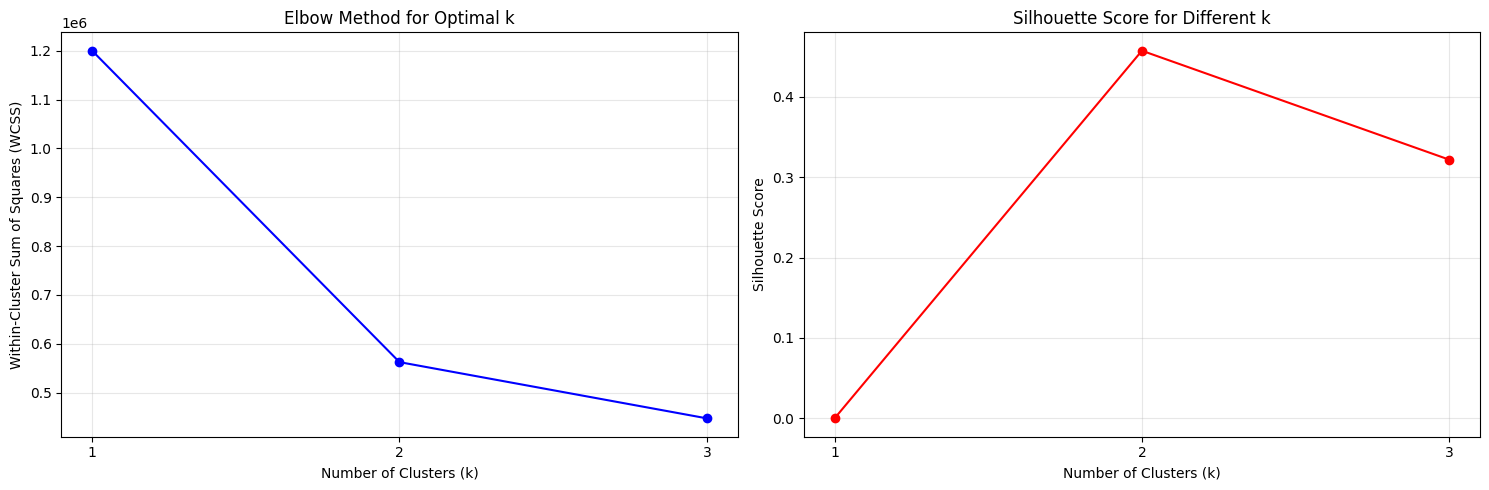

In [ ]:
# Determine optimal number of clusters using Elbow Method
KMM_range = range(1, 4)
WCSS = []
silhouette_scores = []

print("Calculating WCSS and Silhouette Scores for different k values")

for k in KMM_range:
    KMM = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)
    KMM.fit(scaled_features)
    WCSS.append(KMM.inertia_)
    
    # Calculate silhouette score for k > 1
    if k > 1:
        sil_score = silhouette_score(scaled_features, KMM.labels_)
        silhouette_scores.append(sil_score)
    else:
        silhouette_scores.append(0)

# Create elbow plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(KMM_range, WCSS, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True, alpha=0.3)
plt.xticks(KMM_range)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

plt.tight_layout()
plt.show()

In [32]:
# Find optimal k based on silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters based on highest silhouette score: {optimal_k}")
print(f"Silhouette Score for k={optimal_k}: {max(silhouette_scores):.4f}")


Optimal number of clusters based on highest silhouette score: 2
Silhouette Score for k=2: 0.4575


### K-Means Clustering Implementation

In [33]:
# Apply K-Means clustering with optimal k
optimal_kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, random_state=42)
cluster_labels = optimal_kmeans.fit_predict(scaled_features)

# Add cluster labels to the original dataset
customer_data['cluster'] = cluster_labels

print(f"K-Means Clustering Results (k={optimal_k}):")
print(f"Total customers clustered: {len(customer_data)}")
print(f"Number of clusters: {optimal_k}")
print(f"Final silhouette score: {silhouette_score(scaled_features, cluster_labels):.4f}")

print("\nCluster Distribution:")
cluster_counts = customer_data['cluster'].value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(customer_data)) * 100
    print(f"Cluster {cluster_id}: {count} customers ({percentage:.1f}%)")


K-Means Clustering Results (k=2):
Total customers clustered: 200000
Number of clusters: 2
Final silhouette score: 0.4575

Cluster Distribution:
Cluster 0: 71391 customers (35.7%)
Cluster 1: 128609 customers (64.3%)


### Cluster Analysis and Interpretation

In [35]:
# Analyze cluster characteristics
print("Cluster Characteristics Analysis:")
print("="*50)

cluster_summary = customer_data.groupby('cluster')[feature_columns].agg(['mean', 'std']).round(2)

for cluster_id in sorted(customer_data['cluster'].unique()):
    print(f"\nCluster {cluster_id} Profile:")
    print("-" * 30)
    
    cluster_data = customer_data[customer_data['cluster'] == cluster_id]
    cluster_size = len(cluster_data)
    
    print(f"Size: {cluster_size} customers")
    print(f"Annual Spending: ${cluster_data['annual_spending'].mean():.0f} ± ${cluster_data['annual_spending'].std():.0f}")
    print(f"Purchase Frequency: {cluster_data['purchase_frequency'].mean():.1f} ± {cluster_data['purchase_frequency'].std():.1f}")
    print(f"Average Order Value: ${cluster_data['avg_order_value'].mean():.0f} ± ${cluster_data['avg_order_value'].std():.0f}")
    print(f"Loyalty Score: {cluster_data['loyalty_score'].mean():.1f} ± {cluster_data['loyalty_score'].std():.1f}")
    print(f"Average Age: {cluster_data['age'].mean():.1f} ± {cluster_data['age'].std():.1f}")
    print(f"Total Products Purchased: {cluster_data['total_products_purchased'].mean():.0f} ± {cluster_data['total_products_purchased'].std():.0f}")


Cluster Characteristics Analysis:

Cluster 0 Profile:
------------------------------
Size: 71391 customers
Annual Spending: $6444 ± $898
Purchase Frequency: 34.4 ± 8.0
Average Order Value: $348 ± $76
Loyalty Score: 79.1 ± 11.7
Average Age: 44.6 ± 10.0
Total Products Purchased: 119 ± 40

Cluster 1 Profile:
------------------------------
Size: 128609 customers
Annual Spending: $2294 ± $1101
Purchase Frequency: 14.8 ± 8.7
Average Order Value: $148 ± $65
Loyalty Score: 39.6 ± 18.2
Average Age: 38.0 ± 12.4
Total Products Purchased: 46 ± 27


### Cluster Visualization

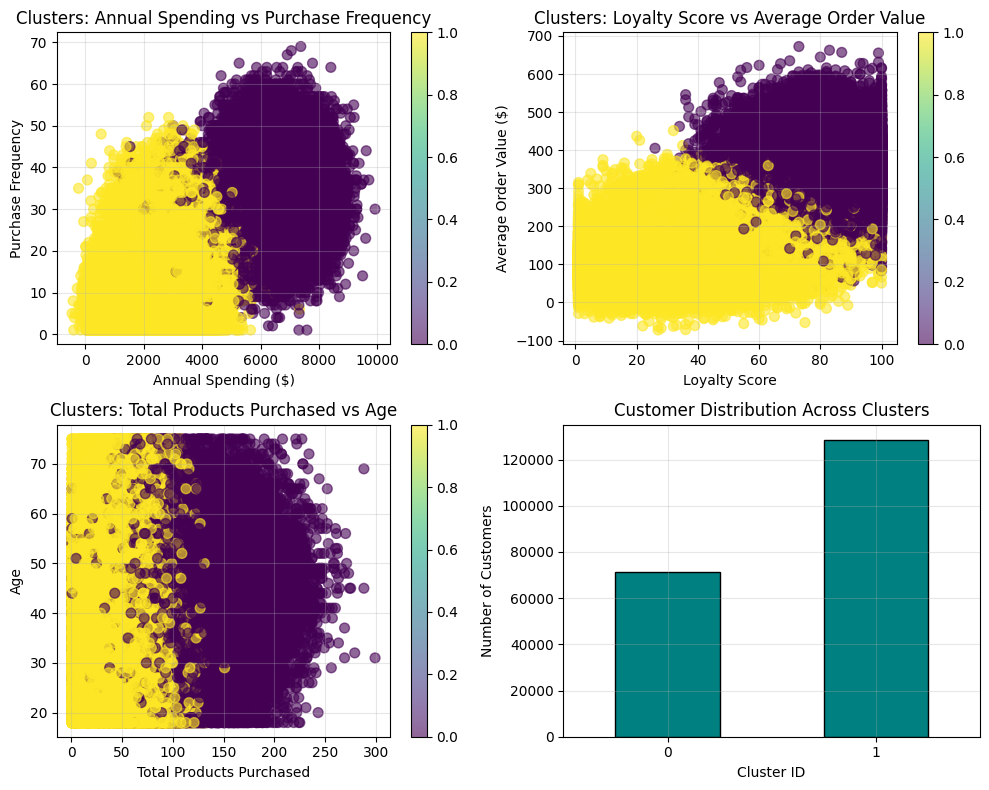

In [58]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot 1: Annual Spending vs Purchase Frequency
scatter1 = axes[0, 0].scatter(customer_data['annual_spending'], customer_data['purchase_frequency'], 
                             c=customer_data['cluster'], cmap='viridis', alpha=0.6, s=50)
axes[0, 0].set_xlabel('Annual Spending ($)', )
axes[0, 0].set_ylabel('Purchase Frequency', )
axes[0, 0].set_title('Clusters: Annual Spending vs Purchase Frequency')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Loyalty Score vs Average Order Value
scatter2 = axes[0, 1].scatter(customer_data['loyalty_score'], customer_data['avg_order_value'], 
                             c=customer_data['cluster'], cmap='viridis', alpha=0.6, s=50)
axes[0, 1].set_xlabel('Loyalty Score', )
axes[0, 1].set_ylabel('Average Order Value ($)', )
axes[0, 1].set_title('Clusters: Loyalty Score vs Average Order Value')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Total Products Purchased vs Age
scatter3 = axes[1, 0].scatter(customer_data['total_products_purchased'], customer_data['age'], 
                             c=customer_data['cluster'], cmap='viridis', alpha=0.6, s=50)
axes[1, 0].set_xlabel('Total Products Purchased', )
axes[1, 0].set_ylabel('Age', )
axes[1, 0].set_title('Clusters: Total Products Purchased vs Age')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Cluster Size Distribution
cluster_counts.plot(kind='bar', ax=axes[1, 1], color='teal', edgecolor='black')
axes[1, 1].set_xlabel('Cluster ID', )
axes[1, 1].set_ylabel('Number of Customers', )
axes[1, 1].set_title('Customer Distribution Across Clusters')
axes[1, 1].tick_params(axis='x', rotation=0)
axes[1, 1].grid(True, alpha=0.3)

# Add colorbar
plt.colorbar(scatter1, ax=axes[0, 0])
plt.colorbar(scatter2, ax=axes[0, 1])
plt.colorbar(scatter3, ax=axes[1, 0])

plt.tight_layout()
plt.show()

### Cluster Centers Analysis

Cluster Centers


,annual_spending,purchase_frequency,avg_order_value,loyalty_score,age,total_products_purchased
Cluster 0,6442.61,34.39,348.21,79.08,44.56,118.89
Cluster 1,2293.80,14.75,148.32,39.64,37.96,45.74


<Figure size 800x400 with 0 Axes>

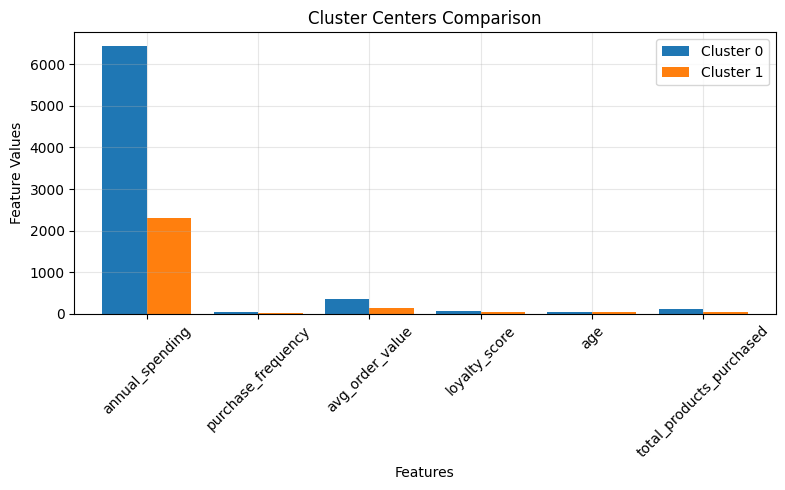

In [61]:
# Analyze cluster centers in original scale
cluster_centers_scaled = optimal_kmeans.cluster_centers_
cluster_centers_original = feature_scaler.inverse_transform(cluster_centers_scaled)

centers_df = pd.DataFrame(cluster_centers_original, columns=feature_columns)
centers_df.index = [f'Cluster {i}' for i in range(optimal_k)]

print("Cluster Centers")
display(centers_df.round(2))

# Visualize cluster centers
plt.figure(figsize=(8, 4))
centers_df.T.plot(kind='bar', figsize=(8, 5), width=0.8)
plt.title('Cluster Centers Comparison')
plt.xlabel('Features')
plt.ylabel('Feature Values')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Output and Result Interpretation

The K-Means clustering analysis has successfully segmented the 200,000 customers into distinct groups based on their purchasing behavior and demographic characteristics. Even though I had created 3 distinct zones of data, the Silhouette score suggested k=2 is the best way forward. This is also reflected in the visualization as we can see that there are overlaps even in 2 clusters. So a 3 cluster would not have been helpful anyways.

Looking at the cluster centers, we can see that the algorithm has split the data into High-value customers (Cluster 0) and Regular customers (Cluster 1).

When considering annual spending cluster center, we see that cluster 0 is at `$6,444` and cluster 1 is at `$2,294`.

We can see similar trends of high and low spending customers in other features as well such as Purchase frequency, Total product purchase and Average order value.

However, we can see that it is not perfect from the graphs. There are overlaps of clusters as seen from the graphs. Regardless, K-Means clustering demonstrates the power of unsupervised learning in discovering patterns in customer data. We did not need any labeled data for this purpose and that is a valuable power when we have large amount of unlabeled data.